In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.drop(columns=["CustomerId","Surname","RowNumber"],inplace=True)

In [10]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [15]:
X=df.drop(columns=["Exited"])
Y=df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/home/appsmartz/miniconda3/envs/rpa/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-19 11:32:47.997473: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [35]:
history=model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8134 - loss: 0.4159 - val_accuracy: 0.8188 - val_loss: 0.4172
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8143 - loss: 0.4115 - val_accuracy: 0.8200 - val_loss: 0.4165
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8106 - loss: 0.4173 - val_accuracy: 0.8213 - val_loss: 0.4159
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.8167 - loss: 0.4079 - val_accuracy: 0.8213 - val_loss: 0.4152
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8122 - loss: 0.4172 - val_accuracy: 0.8231 - val_loss: 0.4144
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8166 - loss: 0.4072 - val_accuracy: 0.8219 - val_loss: 0.4137
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8205 - loss: 0.4118 - val_accuracy: 0.8225 - val_loss: 0.4128
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8119 - loss: 0.4169 - 

In [36]:
model.layers[0].get_weights()

[array([[-0.056425  ,  0.1489022 ,  0.149569  ],
        [ 1.0826193 , -3.2343597 , -0.7736009 ],
        [-0.06249772, -0.09585931,  0.1399903 ],
        [ 0.25915176,  0.14998105, -0.43142903],
        [-1.653205  , -0.08278789, -0.29584074],
        [-0.2323093 , -0.17715584, -0.14559056],
        [-0.49853405, -0.11518168,  1.4346608 ],
        [-0.14433472, -0.04067425, -0.2959206 ],
        [ 0.13539569, -0.5006456 , -1.0884326 ],
        [ 0.07953257, -0.03343686, -0.03428011],
        [-0.42873818,  0.13041764,  0.6778876 ]], dtype=float32),
 array([-0.648077  ,  0.38917083,  0.87388057], dtype=float32)]

In [37]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


In [38]:
y_pred=np.where(y_log>0.5,1,0)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.808

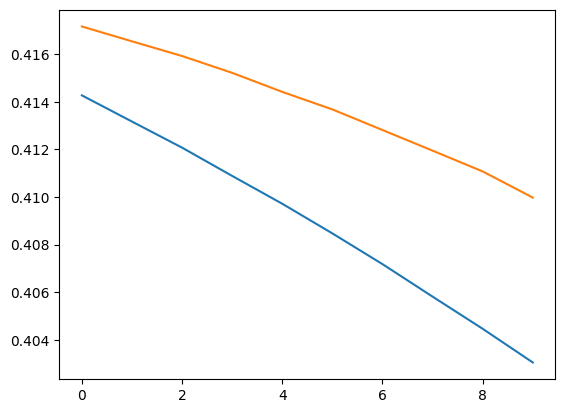

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])